# Make your own `ImagePipeline`

For a more detailed explanation on the components of `phenotypic.Image` and `phenotypic.GridImage` are see the Images tutorial.

This tutorial demonstrates how to build and use image processing pipelines in PhenoTypic for automated analysis of arrayed microbial colonies on agar plates.


(<Figure size 800x600 with 1 Axes>, <Axes: >)

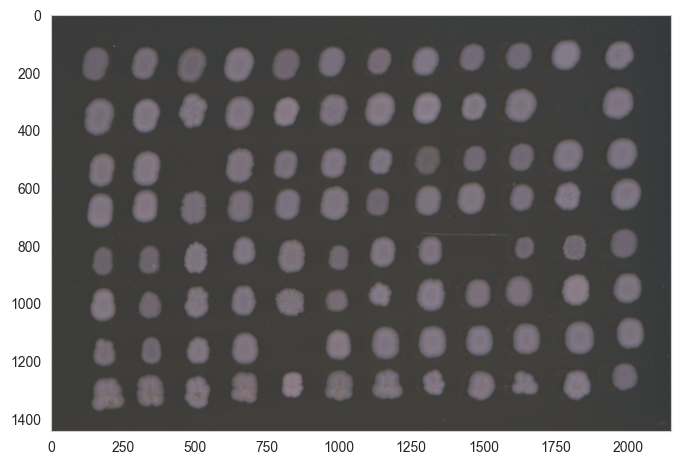

In [1]:
import phenotypic as pht

plate_image = pht.GridImage(pht.data.load_plate_72hr())
plate_image.show()


(<Figure size 1000x500 with 2 Axes>,
 array([(<Figure size 1000x500 with 2 Axes>, <Axes: title={'center': '06139438-8c90-481f-a887-4dc31df7bbc4'}>),
        <Axes: >], dtype=object))

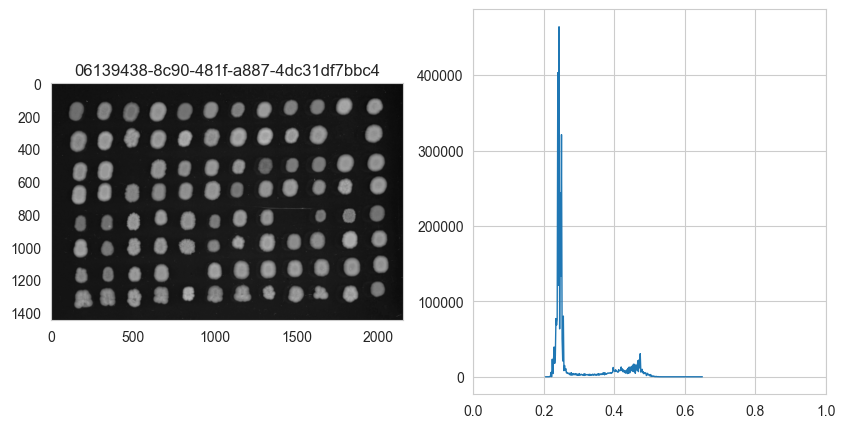

In [ ]:
plate_image.enh_gray.histogram()


Many traditional computer vision operations operate on the grayscale matrix for calculations. Thus, `Image.enh_gray.histogram()` is a powerful tool for deciding what operations our images needs to successfuly process. PhenoTypic uses a a two-path strategy for measurement and detection. Many operations that improve object detection affect the data integrity of the original grayscale which is used for intensity measurements. Thus, we incorporate the `enh_gray` matrix which is a copy of the original grayscale matrix used for operations that enhance detection. Operations for enhancing detection can be found in `phenotypic.enhace`.

(<Figure size 900x1000 with 1 Axes>, <Axes: >)

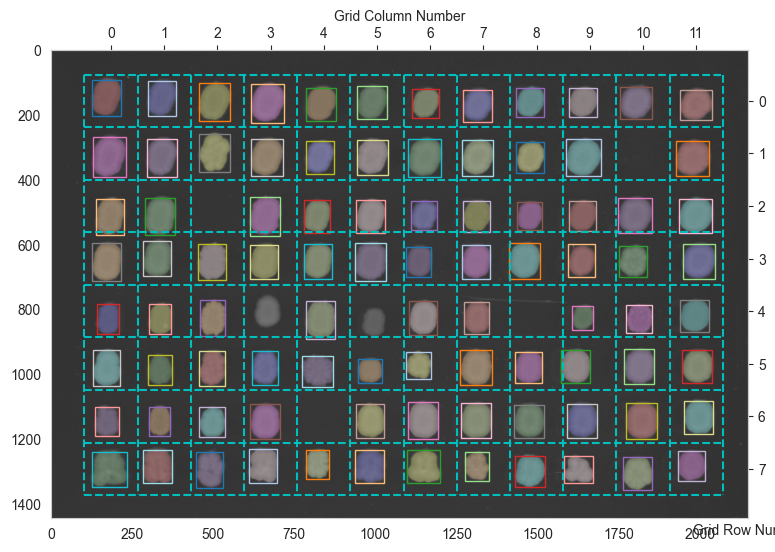

In [4]:
from phenotypic import ImagePipeline
from phenotypic.enhance import CLAHE, GaussianBlur, MedianEnhancer, ContrastStretching
from phenotypic.detect import WatershedDetector
from phenotypic.correction import GridAligner
from phenotypic.grid import GridApply, MinResidualErrorReducer, GridAlignmentOutlierRemover
from phenotypic.refine import BorderObjectRemover, SmallObjectRemover, LowCircularityRemover
from phenotypic.refine import MaskFill

from phenotypic.measure import MeasureColor, MeasureShape, MeasureIntensity, MeasureTexture

kmarx_pipeline = ImagePipeline(
        ops={
            'blur'                            : GaussianBlur(sigma=5),
            'clahe'                           : CLAHE(),
            'median filter'                   : MedianEnhancer(),
            'detection'                       : WatershedDetector(footprint='auto', min_size=50, relabel=True),
            'mask_fill'                       : MaskFill(),
            'RemoveBorderObjects'             : BorderObjectRemover(),
            'low circularity remover'         : LowCircularityRemover(0.7),
            'reduce by section residual error': MinResidualErrorReducer(),
            'outlier removal'                 : GridAlignmentOutlierRemover(),
            'align'                           : GridAligner(),
            'grid_reduction'                  : MinResidualErrorReducer(),
        },
        meas={
            'MeasureColor'    : MeasureColor(),
            'MeasureShape'    : MeasureShape(),
            'MeasureIntensity': MeasureIntensity(),
            'MeasureTexture'  : MeasureTexture(scale=3),
            'MeasureTexture2' : MeasureTexture(scale=4),
        }
)

pipeline_output = kmarx_pipeline.apply(plate_image)
pipeline_output.objects.relabel()
pipeline_output.show_overlay()


(<Figure size 900x1000 with 1 Axes>, <Axes: >)

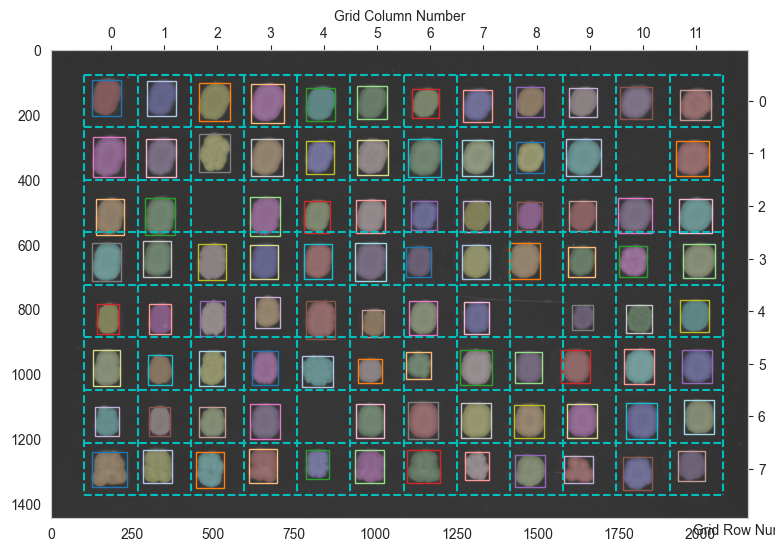

In [ ]:
from phenotypic.prefab import HeavyWatershedPipeline

pipeline_output2 = HeavyWatershedPipeline().apply(plate_image)
pipeline_output2.show_overlay()


(<Figure size 1000x500 with 2 Axes>,
 array([(<Figure size 1000x500 with 2 Axes>, <Axes: title={'center': '44fb607b-d11f-4d9e-b225-0f2b9b052746'}>),
        <Axes: >], dtype=object))

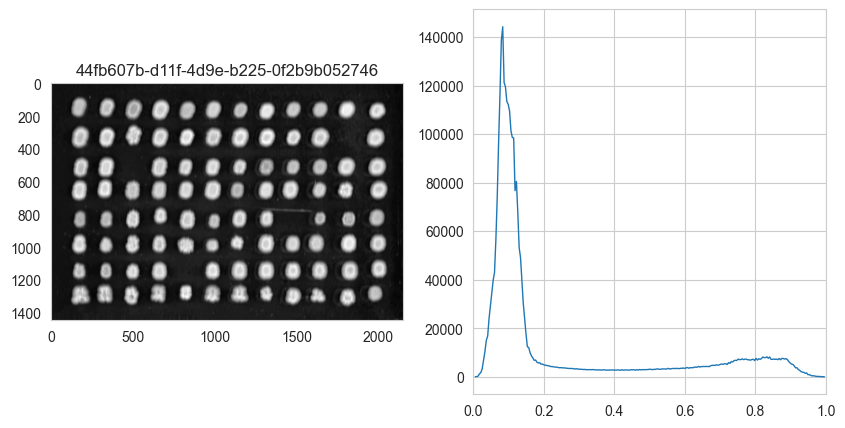

In [6]:
pipeline_output.enh_gray.histogram()


In [7]:
pipeline_meas = kmarx_pipeline.measure(pipeline_output, include_metadata=False)
pipeline_meas


,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum,...,TextureGray_HaralickVariance-avg-scale04,TextureGray_InverseDifferenceMoment-avg-scale04,TextureGray_SumAverage-avg-scale04,TextureGray_SumVariance-avg-scale04,TextureGray_SumEntropy-avg-scale04,TextureGray_Entropy-avg-scale04,TextureGray_DiffVariance-avg-scale04,TextureGray_DiffEntropy-avg-scale04,TextureGray_InfoCorrelation1-avg-scale04,TextureGray_InfoCorrelation2-avg-scale04
0,1,146.506703,170.569699,91,128,204,216,0,0,0,...,0.227501,0.917104,23.561500,0.725170,1.245760,1.447084,0.044131,0.675382,-0.292161,0.617447
1,2,149.396380,340.542659,97,298,204,386,0,1,1,...,0.738942,0.779646,25.834356,2.456797,2.475868,2.975292,0.028841,1.102396,-0.263979,0.763785
2,3,160.823387,503.184827,103,456,218,552,0,2,2,...,0.491629,0.844037,24.416443,1.642722,2.198116,2.531479,0.035992,0.916609,-0.294202,0.753914
3,4,163.507507,667.136392,105,616,224,720,0,3,3,...,1.169566,0.787356,27.764862,4.112562,2.690033,3.187108,0.026823,1.193745,-0.348834,0.855079
4,5,162.581936,988.687380,112,945,214,1035,0,5,5,...,1.006358,0.829287,26.639336,3.560625,2.155954,2.585183,0.032185,1.086397,-0.390953,0.841887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1293.937771,489.301356,1239,448,1349,532,7,2,86,...,1.108200,0.742637,27.649365,3.755580,2.774204,3.409272,0.024679,1.263264,-0.269797,0.802120
86,87,1284.021505,1311.323189,1239,1275,1328,1350,7,7,91,...,1.370031,0.729467,27.969614,4.622844,2.764216,3.452672,0.021514,1.404993,-0.260746,0.795513
87,88,1298.299929,1475.423016,1250,1430,1348,1523,7,8,92,...,1.242901,0.774189,27.577465,4.450449,2.823792,3.349485,0.026872,1.125120,-0.352028,0.868454
88,89,1296.660489,1624.861193,1252,1582,1335,1670,7,9,93,...,1.464127,0.724083,27.086165,5.091357,2.989982,3.669252,0.023581,1.321775,-0.301962,0.848755


(<Figure size 800x600 with 1 Axes>, <Axes: >)

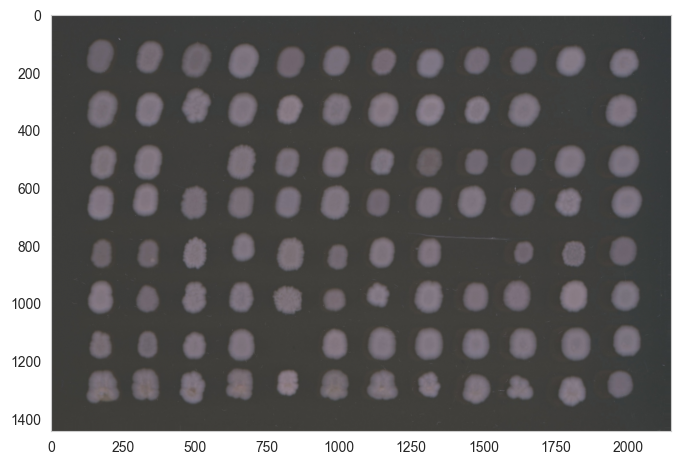

In [8]:
pipeline_output.rgb.show()


min: 0.18000000715255737 max: 0.6553000211715698


<Axes: ylabel='Count'>

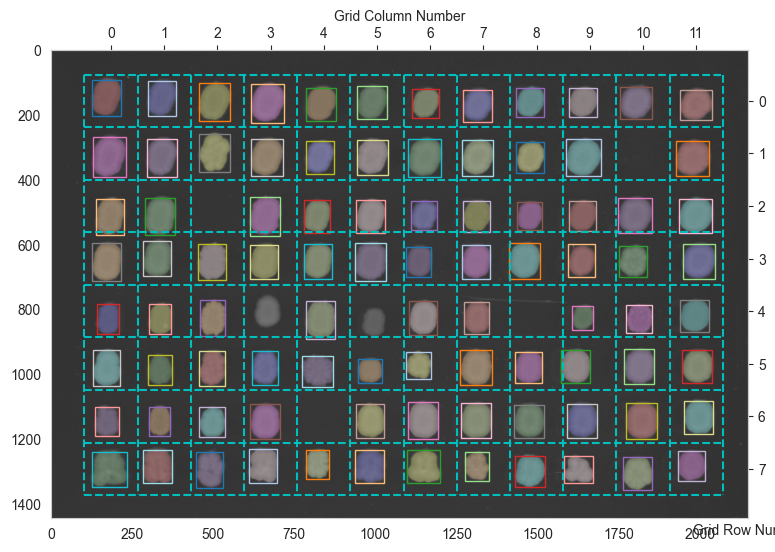

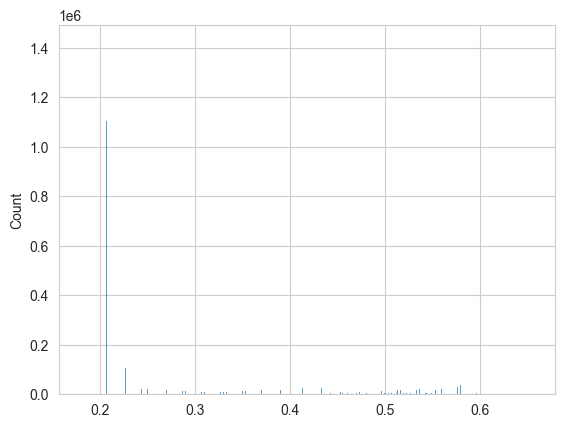

In [9]:
fig, ax = pipeline_output.show_overlay()
overlay_arr = ax.images[0].get_array()

import seaborn as sns
import matplotlib.pyplot as plt

hist_fig, hist_ax = plt.subplots()
print(f'min: {overlay_arr.min()} max: {overlay_arr.max()}')
sns.histplot(overlay_arr.ravel(), ax=hist_ax)


In [10]:
CLAHE.__name__


'CLAHE'

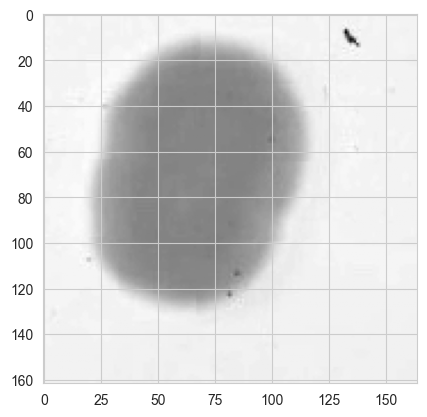

In [11]:
colony_image = pipeline_output.grid[0]
from skimage.util import invert

colony_matrix = invert(colony_image.gray[:])

import matplotlib.pyplot as plt

plt.imshow(colony_matrix, cmap='gray')


(<Figure size 800x600 with 1 Axes>, <Axes: >)

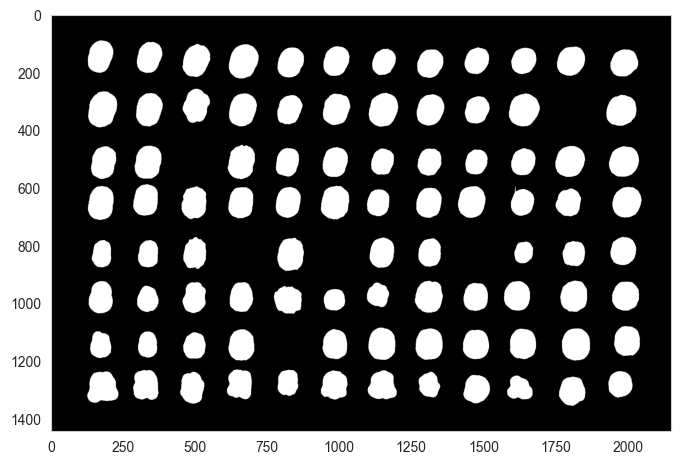

In [12]:
pipeline_output.objmask.show()


In [13]:
pipeline_output.grid.info()


,Metadata_BitDepth,Metadata_ImageType,Metadata_ParentImageName,Metadata_ImageName,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum
0,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,1,146.506703,170.569699,91,128,204,216,0,0,0
1,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,2,149.396380,340.542659,97,298,204,386,0,1,1
2,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,3,160.823387,503.184827,103,456,218,552,0,2,2
3,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,4,163.507507,667.136392,105,616,224,720,0,3,3
4,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,5,162.581936,988.687380,112,945,214,1035,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,86,1293.937771,489.301356,1239,448,1349,532,7,2,86
86,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,87,1284.021505,1311.323189,1239,1275,1328,1350,7,7,91
87,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,88,1298.299929,1475.423016,1250,1430,1348,1523,7,8,92
88,8,GridImage,b'',44fb607b-d11f-4d9e-b225-0f2b9b052746,89,1296.660489,1624.861193,1252,1582,1335,1670,7,9,93


In [14]:
shape_measurements = MeasureShape().measure(pipeline_output)
shape_measurements


,ObjectLabel,Shape_Area,Shape_Perimeter,Shape_Circularity,Shape_ConvexArea,Shape_MedianRadius,Shape_MeanRadius,Shape_MaxRadius,Shape_MinFeretDiameter,Shape_MaxFeretDiameter,Shape_Eccentricity,Shape_Solidity,Shape_Extent,Shape_BboxArea,Shape_MajorAxisLength,Shape_MinorAxisLength,Shape_Compactness,Shape_Orientation
0,1,7683.0,335.563492,0.857415,317.616082,14.142136,15.782705,41.048752,82.443454,112.946890,0.688207,24.189581,0.772627,9944.0,116.287931,84.368585,1.166296,-0.301111
1,2,7349.0,328.492424,0.855830,309.802847,13.928388,15.490497,40.718546,81.270536,110.208893,0.672004,23.721538,0.780480,9416.0,112.570343,83.363638,1.168457,-0.346249
2,3,8278.0,347.948268,0.859223,328.849209,14.764823,16.493031,43.863424,87.862531,116.468880,0.642563,25.172632,0.749819,11040.0,117.424997,89.974903,1.163842,-0.392919
3,4,9458.0,371.019336,0.863408,349.273610,16.000000,17.849295,48.010416,95.703709,122.114700,0.609198,27.079057,0.764221,12376.0,123.330059,97.802935,1.158201,-0.400819
4,5,7274.0,321.078210,0.886669,305.533007,14.000000,15.731636,42.059482,84.970583,107.540690,0.601665,23.807575,0.792375,9180.0,107.762019,86.074754,1.127817,-0.429974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,7151.0,328.492424,0.832772,309.230424,13.416408,14.925836,39.293765,80.445199,109.457754,0.672877,23.125150,0.773918,9240.0,111.295764,82.331500,1.200809,0.026111
86,87,4929.0,271.178716,0.842282,255.516412,11.180340,12.558015,34.000000,71.975989,88.566359,0.577093,19.290346,0.738427,6675.0,88.080214,71.933216,1.187251,0.189082
87,88,6995.0,317.078210,0.874309,299.816627,13.601471,15.440377,43.104524,87.467796,99.824847,0.440490,23.330928,0.767501,9114.0,99.870924,89.659878,1.143761,-0.365050
88,89,5396.0,294.592929,0.781335,273.725269,11.180340,12.340611,33.541020,79.881659,95.131488,0.497171,19.713196,0.738773,7304.0,90.984682,78.943092,1.279861,0.962156


In [15]:
intensity_measurements = MeasureIntensity().measure(pipeline_output)
intensity_measurements


,ObjectLabel,Intensity_IntegratedIntensity,Intensity_MinimumIntensity,Intensity_MaximumIntensity,Intensity_MeanIntensity,Intensity_MedianIntensity,Intensity_StandardDeviationIntensity,Intensity_CoefficientVarianceIntensity,Intensity_LowerQuartileIntensity,Intensity_UpperQuartileIntensity,Intensity_InterquartileRangeIntensity
0,1,2958.221342,0.315973,0.447028,0.385035,0.393280,0.018061,0.046913,0.376440,0.398012,0.021572
1,2,3051.176300,0.320162,0.450094,0.415183,0.424600,0.027032,0.065118,0.400252,0.434407,0.034155
2,3,3272.532053,0.328571,0.435546,0.395329,0.398831,0.021133,0.053463,0.386255,0.412017,0.025762
3,4,4201.881607,0.312051,0.483713,0.444267,0.458502,0.035672,0.080303,0.428522,0.470267,0.041745
4,5,3086.875557,0.310102,0.457401,0.424371,0.442251,0.032696,0.077056,0.407827,0.448993,0.041165
...,...,...,...,...,...,...,...,...,...,...,...
85,86,3162.189429,0.327134,0.499667,0.442202,0.453435,0.033906,0.076686,0.421029,0.469702,0.048673
86,87,2198.213529,0.319291,0.508597,0.445976,0.458502,0.039786,0.089229,0.423514,0.476123,0.052609
87,88,3087.983356,0.334977,0.497153,0.441456,0.454581,0.035957,0.081463,0.415938,0.469955,0.054016
88,89,2332.659890,0.304446,0.489875,0.432294,0.445071,0.039725,0.091911,0.406375,0.465497,0.059122


In [16]:
texture_measurements = MeasureTexture().measure(pipeline_output)
texture_measurements


,ObjectLabel,TextureGray_AngularSecondMoment-deg000-scale05,TextureGray_AngularSecondMoment-deg045-scale05,TextureGray_AngularSecondMoment-deg090-scale05,TextureGray_AngularSecondMoment-deg135-scale05,TextureGray_Contrast-deg000-scale05,TextureGray_Contrast-deg045-scale05,TextureGray_Contrast-deg090-scale05,TextureGray_Contrast-deg135-scale05,TextureGray_Correlation-deg000-scale05,...,TextureGray_HaralickVariance-avg-scale05,TextureGray_InverseDifferenceMoment-avg-scale05,TextureGray_SumAverage-avg-scale05,TextureGray_SumVariance-avg-scale05,TextureGray_SumEntropy-avg-scale05,TextureGray_Entropy-avg-scale05,TextureGray_DiffVariance-avg-scale05,TextureGray_DiffEntropy-avg-scale05,TextureGray_InfoCorrelation1-avg-scale05,TextureGray_InfoCorrelation2-avg-scale05
0,1,0.558316,0.552814,0.569642,0.555018,0.202443,0.259023,0.168024,0.234774,0.540176,...,0.221875,0.905335,23.580289,0.671432,1.232740,1.465662,0.042211,0.737523,-0.225150,0.545807
1,2,0.180660,0.163941,0.191922,0.174283,0.554479,0.847697,0.458532,0.673436,0.616016,...,0.725754,0.745372,25.873170,2.269480,2.452135,3.064197,0.026551,1.217151,-0.188587,0.670832
2,3,0.213661,0.185136,0.234503,0.205185,0.366597,0.532718,0.306311,0.419312,0.621316,...,0.483086,0.813174,24.444996,1.526108,2.198214,2.627109,0.032960,1.017509,-0.213103,0.668218
3,4,0.166461,0.140866,0.179679,0.156046,0.613354,0.927427,0.567785,0.821248,0.735854,...,1.141829,0.752739,27.813244,3.834864,2.685786,3.288824,0.024422,1.320849,-0.273127,0.795296
4,5,0.318597,0.310354,0.329535,0.316081,0.472649,0.787006,0.475967,0.669784,0.763881,...,0.983710,0.804831,26.687383,3.333487,2.139127,2.643253,0.029743,1.204538,-0.325100,0.795182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.127250,0.115386,0.133147,0.112571,0.722618,1.014710,0.661861,1.100062,0.670634,...,1.093264,0.702715,27.693580,3.498243,2.751854,3.512981,0.022611,1.387838,-0.200732,0.725343
86,87,0.146381,0.138619,0.151912,0.132298,0.888765,1.287120,0.890989,1.398475,0.671933,...,1.347841,0.694853,28.026835,4.275028,2.735261,3.548868,0.019423,1.545692,-0.187574,0.709476
87,88,0.127455,0.114668,0.141462,0.118292,0.570484,0.827449,0.505204,0.767981,0.767711,...,1.218594,0.736096,27.629801,4.206596,2.812881,3.446993,0.024862,1.240555,-0.288303,0.823123
88,89,0.114170,0.096859,0.111693,0.101273,0.703868,1.123439,0.863260,1.267260,0.758194,...,1.444939,0.681765,27.143958,4.790298,2.969049,3.776369,0.021634,1.446004,-0.236735,0.790989


,ObjectLabel,Colorxy_xMin,Colorxy_xQ1,Colorxy_xMean,Colorxy_xMedian,Colorxy_xQ3,Colorxy_xMax,Colorxy_xStdDev,Colorxy_xCoeffVar,Colorxy_yMin,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,1,0.307992,0.311256,0.312193,0.312423,0.312431,0.320497,0.001298,0.004157,0.315938,...,0.325490,0.400000,0.409941,0.415686,0.427451,0.466667,0.022148,0.054034,3.882206,3.840626
1,2,0.306805,0.312447,0.313282,0.313721,0.314293,0.320497,0.001651,0.005272,0.316489,...,0.329412,0.427451,0.442559,0.454902,0.462745,0.478431,0.029886,0.067539,4.030819,4.304368
2,3,0.309151,0.312437,0.313206,0.313051,0.314274,0.319059,0.001407,0.004494,0.316610,...,0.341176,0.407843,0.418482,0.423529,0.435294,0.458824,0.023953,0.057245,3.552761,3.638739
3,4,0.305788,0.310754,0.311901,0.312594,0.312598,0.321360,0.001937,0.006212,0.315381,...,0.321569,0.458824,0.475757,0.494118,0.501961,0.525490,0.039734,0.083527,4.330965,4.678852
4,5,0.305485,0.310342,0.311700,0.311406,0.312456,0.322472,0.002012,0.006457,0.314306,...,0.325490,0.435294,0.455866,0.474510,0.482353,0.498039,0.038618,0.084725,4.269135,4.652391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.306004,0.311406,0.313270,0.312598,0.314267,0.328517,0.003480,0.011109,0.315243,...,0.345098,0.454902,0.474502,0.486275,0.501961,0.533333,0.037547,0.079139,3.950601,4.213721
86,87,0.305674,0.311417,0.312889,0.312599,0.314307,0.321468,0.002678,0.008559,0.315241,...,0.333333,0.450980,0.478372,0.494118,0.513725,0.552941,0.045051,0.094196,4.162647,4.321553
87,88,0.307119,0.312431,0.313232,0.312602,0.314243,0.320409,0.001957,0.006248,0.315775,...,0.349020,0.443137,0.470576,0.486275,0.501961,0.533333,0.039857,0.084710,3.974293,4.193629
88,89,0.305485,0.310456,0.312269,0.312463,0.313704,0.320966,0.002399,0.007685,0.315569,...,0.317647,0.431373,0.461090,0.478431,0.498039,0.533333,0.045196,0.098038,3.755356,3.815770


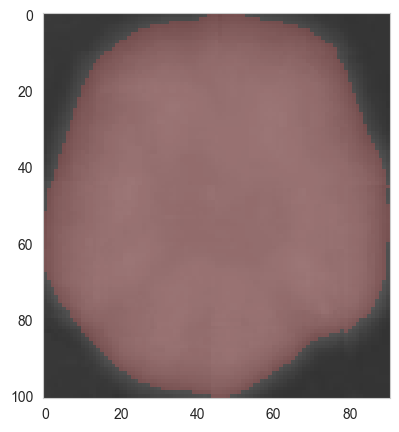

In [17]:
single_object = pipeline_output.objects[-1]
fig, ax = single_object.show_overlay()
color_measurements = MeasureColor().measure(pipeline_output)
color_measurements


In [18]:
color_measurements


,ObjectLabel,Colorxy_xMin,Colorxy_xQ1,Colorxy_xMean,Colorxy_xMedian,Colorxy_xQ3,Colorxy_xMax,Colorxy_xStdDev,Colorxy_xCoeffVar,Colorxy_yMin,...,ColorHSV_BrightnessMin,ColorHSV_BrightnessQ1,ColorHSV_BrightnessMean,ColorHSV_BrightnessMedian,ColorHSV_BrightnessQ3,ColorHSV_BrightnessMax,ColorHSV_BrightnessStdDev,ColorHSV_BrightnessCoeffVar,ColorLab_ChromaEstimatedMean,ColorLab_ChromaEstimatedMedian
0,1,0.307992,0.311256,0.312193,0.312423,0.312431,0.320497,0.001298,0.004157,0.315938,...,0.325490,0.400000,0.409941,0.415686,0.427451,0.466667,0.022148,0.054034,3.882206,3.840626
1,2,0.306805,0.312447,0.313282,0.313721,0.314293,0.320497,0.001651,0.005272,0.316489,...,0.329412,0.427451,0.442559,0.454902,0.462745,0.478431,0.029886,0.067539,4.030819,4.304368
2,3,0.309151,0.312437,0.313206,0.313051,0.314274,0.319059,0.001407,0.004494,0.316610,...,0.341176,0.407843,0.418482,0.423529,0.435294,0.458824,0.023953,0.057245,3.552761,3.638739
3,4,0.305788,0.310754,0.311901,0.312594,0.312598,0.321360,0.001937,0.006212,0.315381,...,0.321569,0.458824,0.475757,0.494118,0.501961,0.525490,0.039734,0.083527,4.330965,4.678852
4,5,0.305485,0.310342,0.311700,0.311406,0.312456,0.322472,0.002012,0.006457,0.314306,...,0.325490,0.435294,0.455866,0.474510,0.482353,0.498039,0.038618,0.084725,4.269135,4.652391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,0.306004,0.311406,0.313270,0.312598,0.314267,0.328517,0.003480,0.011109,0.315243,...,0.345098,0.454902,0.474502,0.486275,0.501961,0.533333,0.037547,0.079139,3.950601,4.213721
86,87,0.305674,0.311417,0.312889,0.312599,0.314307,0.321468,0.002678,0.008559,0.315241,...,0.333333,0.450980,0.478372,0.494118,0.513725,0.552941,0.045051,0.094196,4.162647,4.321553
87,88,0.307119,0.312431,0.313232,0.312602,0.314243,0.320409,0.001957,0.006248,0.315775,...,0.349020,0.443137,0.470576,0.486275,0.501961,0.533333,0.039857,0.084710,3.974293,4.193629
88,89,0.305485,0.310456,0.312269,0.312463,0.313704,0.320966,0.002399,0.007685,0.315569,...,0.317647,0.431373,0.461090,0.478431,0.498039,0.533333,0.045196,0.098038,3.755356,3.815770


In [19]:
pipeline_measurements = kmarx_pipeline.measure(pipeline_output, include_metadata=False)


In [20]:
pipeline_measurements


,ObjectLabel,Bbox_CenterRR,Bbox_CenterCC,Bbox_MinRR,Bbox_MinCC,Bbox_MaxRR,Bbox_MaxCC,Grid_RowNum,Grid_ColNum,Grid_SectionNum,...,TextureGray_HaralickVariance-avg-scale04,TextureGray_InverseDifferenceMoment-avg-scale04,TextureGray_SumAverage-avg-scale04,TextureGray_SumVariance-avg-scale04,TextureGray_SumEntropy-avg-scale04,TextureGray_Entropy-avg-scale04,TextureGray_DiffVariance-avg-scale04,TextureGray_DiffEntropy-avg-scale04,TextureGray_InfoCorrelation1-avg-scale04,TextureGray_InfoCorrelation2-avg-scale04
0,1,146.506703,170.569699,91,128,204,216,0,0,0,...,0.227501,0.917104,23.561500,0.725170,1.245760,1.447084,0.044131,0.675382,-0.292161,0.617447
1,2,149.396380,340.542659,97,298,204,386,0,1,1,...,0.738942,0.779646,25.834356,2.456797,2.475868,2.975292,0.028841,1.102396,-0.263979,0.763785
2,3,160.823387,503.184827,103,456,218,552,0,2,2,...,0.491629,0.844037,24.416443,1.642722,2.198116,2.531479,0.035992,0.916609,-0.294202,0.753914
3,4,163.507507,667.136392,105,616,224,720,0,3,3,...,1.169566,0.787356,27.764862,4.112562,2.690033,3.187108,0.026823,1.193745,-0.348834,0.855079
4,5,162.581936,988.687380,112,945,214,1035,0,5,5,...,1.006358,0.829287,26.639336,3.560625,2.155954,2.585183,0.032185,1.086397,-0.390953,0.841887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,1293.937771,489.301356,1239,448,1349,532,7,2,86,...,1.108200,0.742637,27.649365,3.755580,2.774204,3.409272,0.024679,1.263264,-0.269797,0.802120
86,87,1284.021505,1311.323189,1239,1275,1328,1350,7,7,91,...,1.370031,0.729467,27.969614,4.622844,2.764216,3.452672,0.021514,1.404993,-0.260746,0.795513
87,88,1298.299929,1475.423016,1250,1430,1348,1523,7,8,92,...,1.242901,0.774189,27.577465,4.450449,2.823792,3.349485,0.026872,1.125120,-0.352028,0.868454
88,89,1296.660489,1624.861193,1252,1582,1335,1670,7,9,93,...,1.464127,0.724083,27.086165,5.091357,2.989982,3.669252,0.023581,1.321775,-0.301962,0.848755
